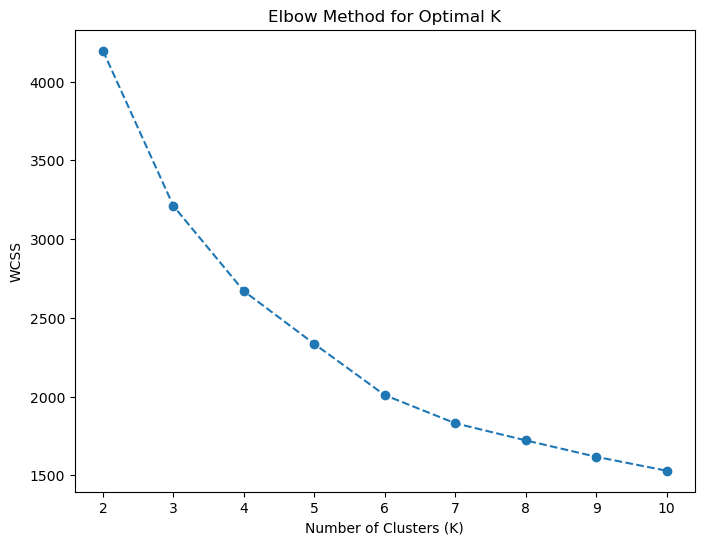

Silhouette Score for 4 clusters: 0.31341596976985453

Cluster Summary:
         Customer_Age  Total_Spending  NumWebVisitsMonth
Cluster                                                 
0           45.254808    1.280267e+06           3.269231
1           46.024166    1.846364e+05           6.890679
2           64.927393    3.519092e+05           5.838284
3           66.860947    1.299852e+06           3.026627


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the pre-processed data
df = pd.read_csv('preproc_nonstandardize.csv')

# --- Feature Selection for Clustering ---
features_for_clustering = ['Customer_Age', 'Total_Spending', 'NumWebVisitsMonth']

X = df[features_for_clustering]

# --- Scale the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Elbow Method to find Optimal Number of Clusters
wcss = [] 
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal K from the plot
optimal_k = 4
# 2. K-Means Clustering Implementation
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Silhouette Score for Evaluation
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

# --- Cluster Analysis ---
cluster_summary = df.groupby('Cluster')[features_for_clustering].mean()
print("\nCluster Summary:")
print(cluster_summary)

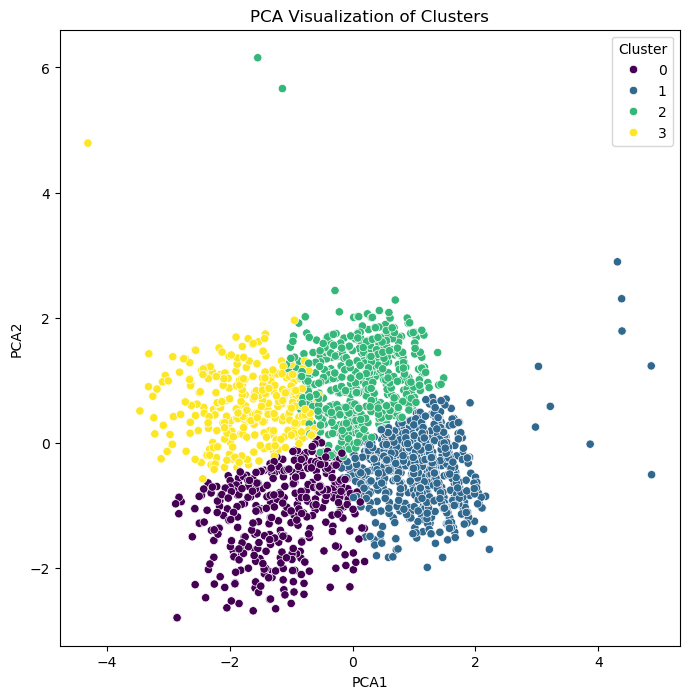

In [43]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
pca_result = pca.fit_transform(X_scaled)  #  Use the scaled data (X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
    
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')  #  Or another palette
plt.title('PCA Visualization of Clusters')
plt.show()

In [41]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
pca_result = pca.fit_transform(X_scaled)  # Use the scaled data (X_scaled)

# Create a DataFrame for Plotly
df_plot = pd.DataFrame({'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 'Cluster': df['Cluster']})  # Replace 'Cluster' with your actual cluster column name

# Create the interactive scatter plot with Plotly Express
fig = px.scatter(df_plot, x='PCA1', y='PCA2', color='Cluster',
                 title='PCA Visualization of Clusters',
                 height=1000, width=1000,
                 hover_data={'PCA1': ':.2f', 'PCA2': ':.2f', 'Cluster': True})  # Add hover data for interactivity

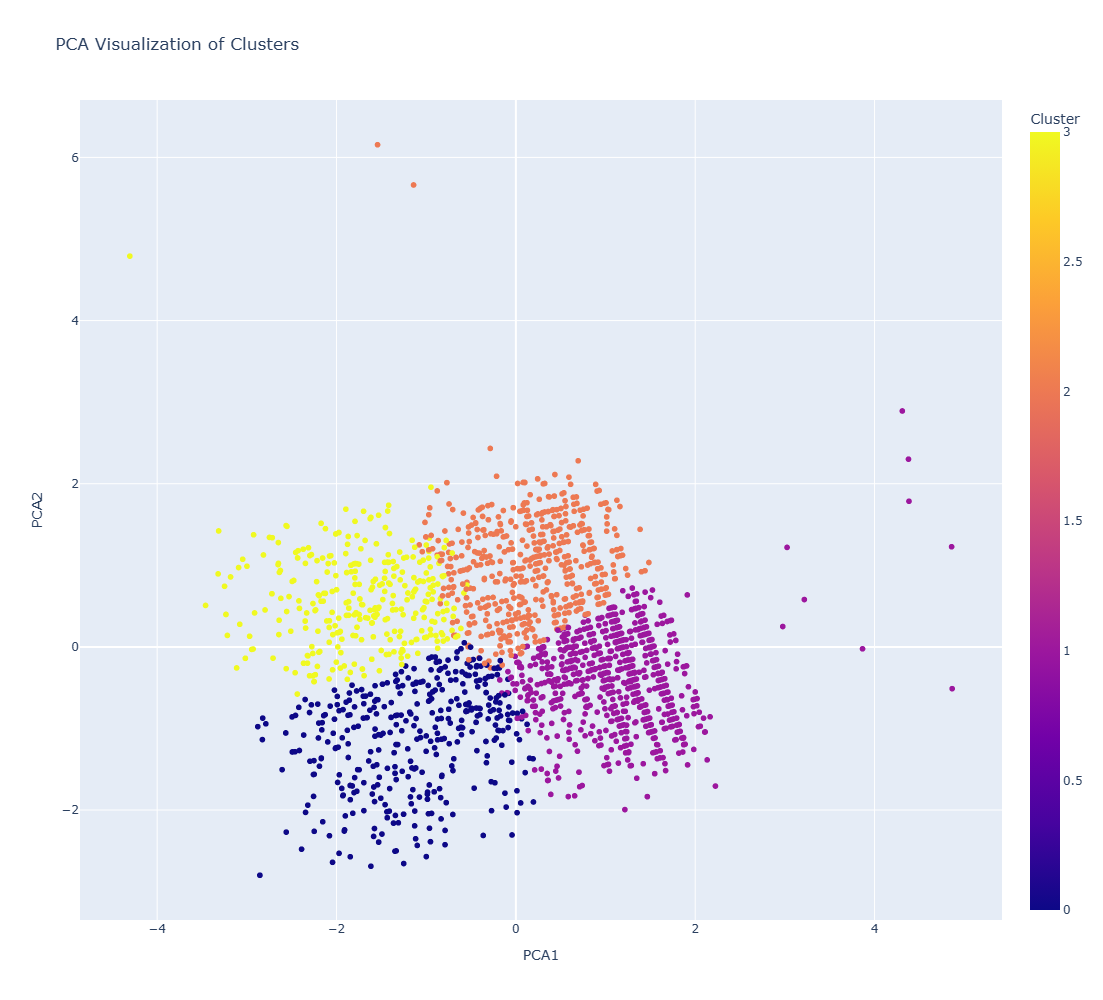

In [42]:
fig.show()